[19782.72980425 16705.81861888 15256.55090527 13961.16067675
 13205.59097906 12785.45531361 12396.58817022]


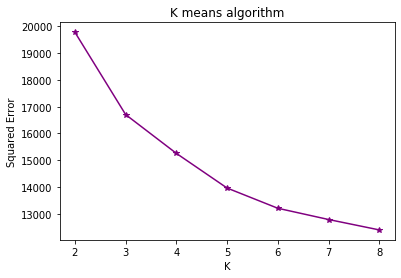

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Data set extraction by deleting first and last columns
data = np.loadtxt('./data.txt', delimiter=',', usecols=(1, 2, 3, 4, 5, 6, 7, 8, 9))
dataorig=np.loadtxt('./data.txt', delimiter=',')

# Initializing k values
k = [2, 3, 4, 5, 6, 7, 8]
plot = np.zeros(len(k))   #array of 0's floating point value
size = data.shape[0]


def k_means():
    for i in k:
        centroid = np.zeros([i, 9])   #2 dimensional array of ix9 zero's
        for j in range(i):
            # Dividing the data from mid point into two parts
            data1 = random.randint(1, int(size / 2))    #generates a random number in betweeen the parameters specified
            data2 = random.randint(int(size / 2), size - 1)
            centroid[j] = np.average(data[data1:data2], axis=0)   #initializing centroid values
            #print(centroid[j])
            
        # Initializing distance and creating copy of centroids with zeros
        distance = np.zeros([size, i])
        #print(centroid.shape) 
        centroid_copy = np.zeros(centroid.shape)  #centroid shape in the form of 2,9 3,9 etc

        while np.sum(centroid - centroid_copy) != 0:
            centroid_copy[:, :] = centroid[:, :]

            for j in range(i):
                distance[:, j] = np.linalg.norm((data - centroid[j]), axis=1)
                classification = np.argsort(distance, axis=1)
                classification = np.delete(classification, np.arange(1, i), 1)   #delete with index

                arrange = np.reshape(np.argsort(classification, axis=0), data.shape[0])  #reshape with rows and cols

                data1 = 0
                potential = 0
                for j in range(data.shape[0] - 1):
                    if classification[arrange[j]] != classification[arrange[j + 1]]:
                        data2 = j + 1
                        centroid[classification[arrange[j]]] = np.average(data[arrange[data1:data2]], axis=0)
                        potential += np.sum(np.square(
                            np.linalg.norm(data[arrange[data1:data2]] - centroid[classification[arrange[j]]], axis=1)))
                        data1 = data2

                centroid[classification[arrange[j - 1]]] = np.average(data[arrange[data1:data.shape[0]]], axis=0)
                potential += np.sum(np.square(
                    np.linalg.norm(data[arrange[data1:data.shape[0]]] - centroid[classification[arrange[j - 1]]],
                                   axis=1)))
            plot[k.index(i)] = potential
    print(plot)


k_means()

plt.plot(k, plot, color='purple', marker='*')
plt.xlabel('K')
plt.ylabel('Squared Error')
plt.title('K means algorithm')
plt.show()

In [61]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)

In [62]:
pca_2d.shape[0]

699

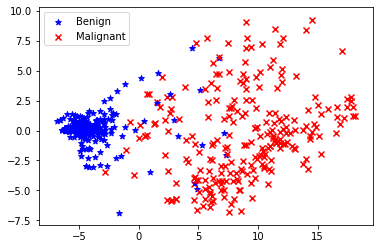

In [63]:
import pylab as pl
var=0
for i in dataorig:
    if i[-1] == 2:
        c1 = pl.scatter(pca_2d[var,0],pca_2d[var,1],c='b',marker='*')
    else:
        c2 = pl.scatter(pca_2d[var,0],pca_2d[var,1],c='r',marker='x')
    var+=1
    
pl.legend([c1, c2], ['Benign', 'Malignant'])
pl.show()

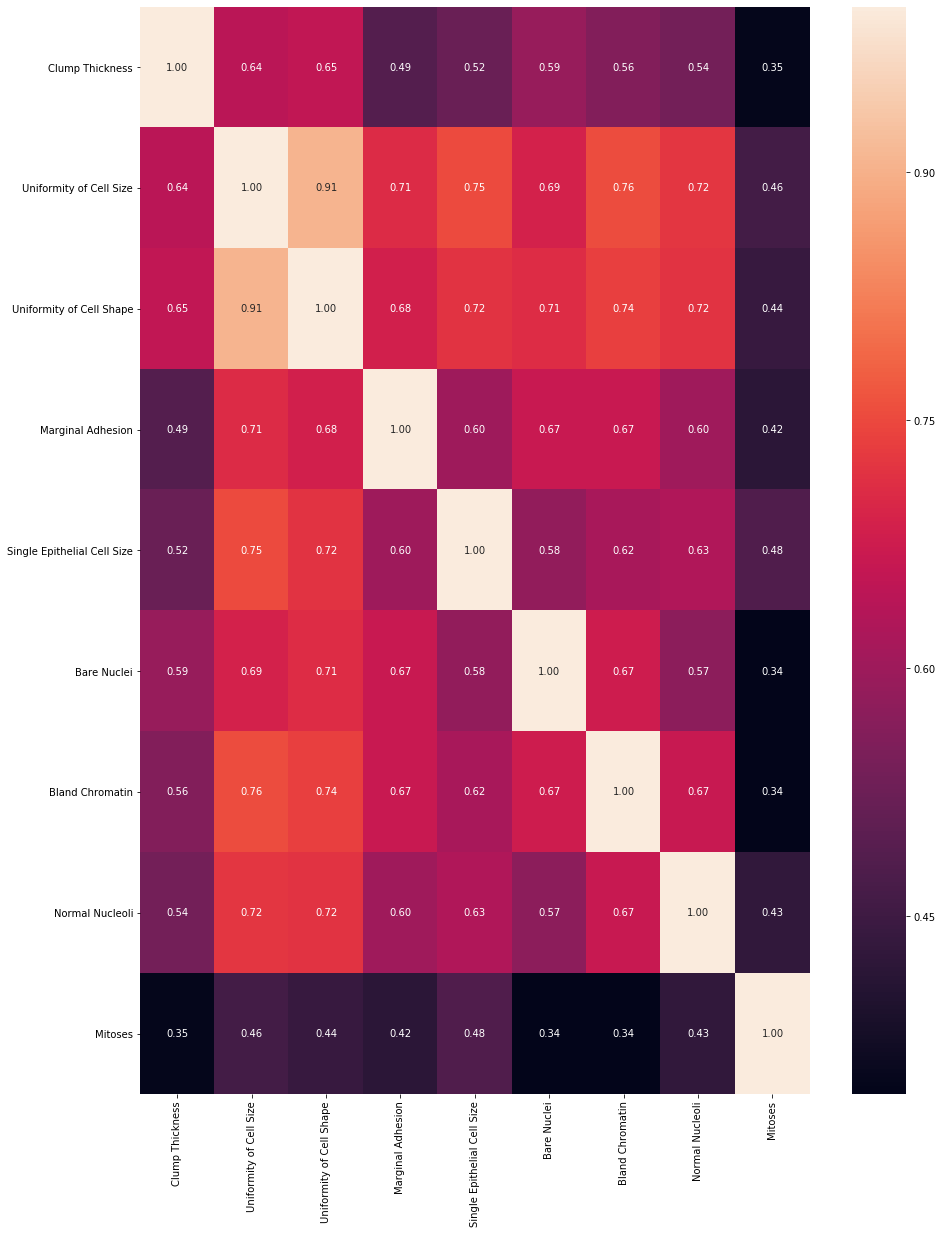

In [65]:
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt

def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# load your data 
df  = pd.read_csv('breast_cancer_mode_replaced.csv')
df = df.drop("Sample code number", axis=1)
df = df.drop(df.columns[0],axis=1)
df=df.drop(df.columns[-1],axis=1)
# plot correlation & densities
plot_correlation(df)


#PCA is used to to reduce dimensionality to 2 -correlation matrix shows how related 2 attributes are